In this post, we'll run a model using the Gradient Boosting (GB) classifier. A GB classifier is a machine learning algorithm that attempts to combine many weak learning models (such as trees) together to create a strong predictive model. GB classifiers are gain popularity due to their effectiveness in classifications problems of complex datasets.

We'll be using Scikit-Learn to implement the gradient boosting classifier.

In [1]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets

Let's load the data. We'll use the bank data publicly available at https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ as bank.zip

In [2]:
data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

<IPython.core.display.Javascript object>

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


Define the data to use for our task. For now, we can simply choose a few variables.

In [3]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})

<IPython.core.display.Javascript object>

We can now split the data and define the dependent variable and the independent variables.

In [4]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

We are now ready to run our model using the Gradient Boosting classifier.

In [5]:
# First, we instantiate Gradient Boosting Regressor
gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Then, we fit to training set
model = gbr.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Next, we check how how model performerd. We now create a confusion matrix to check how the model did in terms of prediction.

In [6]:
#First, we make predictions for the test dataset [0, 1]
pred = model.predict(test[['age','balance','duration']])

#Now we create the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))

array([[787,  20],
       [ 77,  21]], dtype=int64)

The values in the first diagonal (787, 21) are the True Positive (TP) and True Negative (TN), respectively. That is, they are the correct predictions. On the other hand, values in the other dignonal (20, 77) are False Negative (FN) and False Positive (FP), respectively. They indicate the wrong predictions.

A fancier way to plot the confusion matrix:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

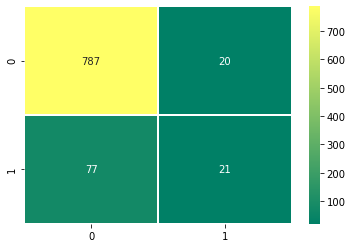

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

Fancier still:

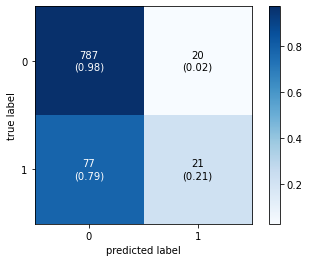

In [8]:
#Using mlextend library (http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
fig, ax = plot_confusion_matrix(conf_mat=cm,
                               show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

We can also plot the ROC/AUC to check vizualize the model's performance.The bigger the Area Under the Curve (AUC), the better performance.

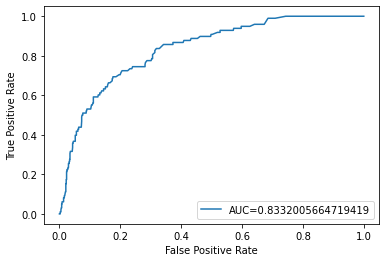

In [9]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = model.predict_proba(test[['age','balance','duration']])[:,1]
fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Another way to plot the ROC/AUC curve

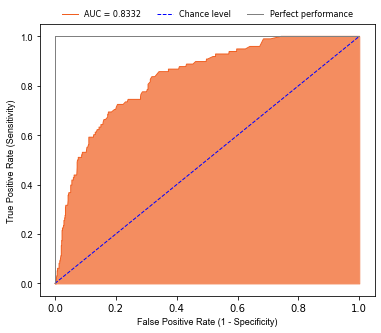

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import bioinfokit #this viz toolkit by Renesh Bedre can be found here: https://www.reneshbedre.com/blog/logistic-regression.html
from bioinfokit.visuz import stat

pred = model.predict_proba(test[['age','balance','duration']])[:,1]
fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))
# plot ROC
bioinfokit.visuz.stat.roc(fpr=fpr, tpr=tpr, auc=auc, 
                          shade_auc=True, per_class=True, 
                          legendpos='upper center', legendanchor=(0.5, 1.08),legendcols=3,
                          show = True)


Earlier, we used the learning rate of 1. Let's try different learning rates and see which one yields a model that performs best for the test data set.

In [11]:
# get independent variables
X_train = train[['age','balance','duration']]
# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

# get independent variables
X_test = test[['age','balance','duration']]
# get response variables
y_test = test[['y']]
y_test = np.ravel(y_test) 

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.883
Accuracy score (validation): 0.892


<IPython.core.display.Javascript object>

Learning rate:  0.075
Accuracy score (training): 0.884
Accuracy score (validation): 0.891


<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.885
Accuracy score (validation): 0.888


<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.896
Accuracy score (validation): 0.891


<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.897
Accuracy score (validation): 0.898


<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.903
Accuracy score (validation): 0.891


<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.904
Accuracy score (validation): 0.887


It looks like the learning rate of 0.5 yields better performance on the validation data set. 